In [1]:
import pandas as pd
dataframe = pd.read_csv(r"C:\Users\Abhishek\Desktop\Computer Science Texas Tech University\Fall 2018\CS 5341 Pattern Recognition\Healthcare Project\train_2v.csv")


In [2]:
print(dataframe.head(5))

      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# take a look at the outcome variable stroke
print(dataframe['stroke'].value_counts())

0    42617
1      783
Name: stroke, dtype: int64


In [4]:
print(dataframe.isnull().sum().sort_values(ascending=False).head())

smoking_status       13292
bmi                   1462
stroke                   0
avg_glucose_level        0
Residence_type           0
dtype: int64


In [5]:
# removing nans from bmi using mean or median
print(dataframe['bmi'].mean())
print(dataframe['bmi'].median())

28.605038390004545
27.7


In [6]:
# decided to replace with mean
dataframe['bmi'].fillna(dataframe['bmi'].mean(), inplace=True)

In [7]:
print(dataframe.isnull().sum().sort_values(ascending=False).head())

smoking_status       13292
stroke                   0
bmi                      0
avg_glucose_level        0
Residence_type           0
dtype: int64


In [9]:
dataframe = dataframe.dropna(subset=['smoking_status']) 

In [10]:
print(dataframe.isnull().sum().sort_values(ascending=False).head())

stroke               0
smoking_status       0
bmi                  0
avg_glucose_level    0
Residence_type       0
dtype: int64


In [12]:
dataframe_clean = dataframe
print (dataframe_clean.head(5))

      id  gender   age  hypertension  heart_disease ever_married  \
1  30468    Male  58.0             1              0          Yes   
3  56543  Female  70.0             0              0          Yes   
6  52800  Female  52.0             0              0          Yes   
7  41413  Female  75.0             0              1          Yes   
8  15266  Female  32.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1        Private          Urban              87.96  39.2     never smoked   
3        Private          Rural              69.04  35.9  formerly smoked   
6        Private          Urban              77.59  17.7  formerly smoked   
7  Self-employed          Rural             243.53  27.0     never smoked   
8        Private          Rural              77.67  32.3           smokes   

   stroke  
1       0  
3       0  
6       0  
7       0  
8       0  


In [13]:
def gendervalue(a):
    if a == 'Male':
        return 1
    if a == 'Female':
        return 0
    if a == 'Other':
        return 3
    
dataframe_clean['gender'] = dataframe_clean['gender'].apply(gendervalue)
    

def work_type_class(a):
    if a == 'Private':
        return 0
    if a == 'Self-employed':
        return 1
    if a == 'children':
        return 2
    if a == 'Govt_job':
        return 3
    if a == 'Never_worked':
        return 4
    
dataframe_clean['work_type'] = dataframe_clean['work_type'].apply(work_type_class)


def ever_married_value(a):
    if a == 'Yes':
        return 1
    if a == 'No':
        return 0
    
dataframe_clean['ever_married'] = dataframe_clean['ever_married'].apply(ever_married_value)

In [14]:
def Residence_type_value(a):
    if a == 'Urban':
        return 1
    if a == 'Rural':
        return 0
    
dataframe_clean['Residence_type'] = dataframe_clean['Residence_type'].apply(Residence_type_value)

def smoking_status_class(a):
    if a == 'never smoked':
        return 0
    if a == 'formerly smoked':
        return 1
    if a == 'smokes':
        return 2
    
dataframe_clean['smoking_status'] = dataframe_clean['smoking_status'].apply(smoking_status_class)

print(dataframe_clean.head(5))

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
1  30468       1  58.0             1              0             1          0   
3  56543       0  70.0             0              0             1          0   
6  52800       0  52.0             0              0             1          0   
7  41413       0  75.0             0              1             1          1   
8  15266       0  32.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
1               1              87.96  39.2               0       0  
3               0              69.04  35.9               1       0  
6               1              77.59  17.7               1       0  
7               0             243.53  27.0               0       0  
8               0              77.67  32.3               2       0  


In [15]:
import numpy as np
from pandas import Series, DataFrame

from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [16]:
%matplotlib inline
rcParams['figure.figsize']=10,8
sb.set_style('whitegrid')

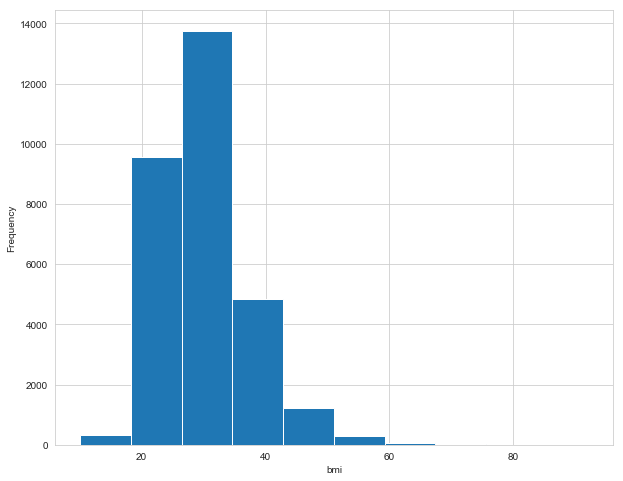

In [18]:
dataframe_clean.columns = ['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level', 'bmi','smoking_status','stroke']
dataframe_clean.index = dataframe_clean.id
bmi = dataframe_clean['bmi']
plt.xlabel('bmi')
plt.ylabel('frequency')
bmi.plot(kind ='hist')

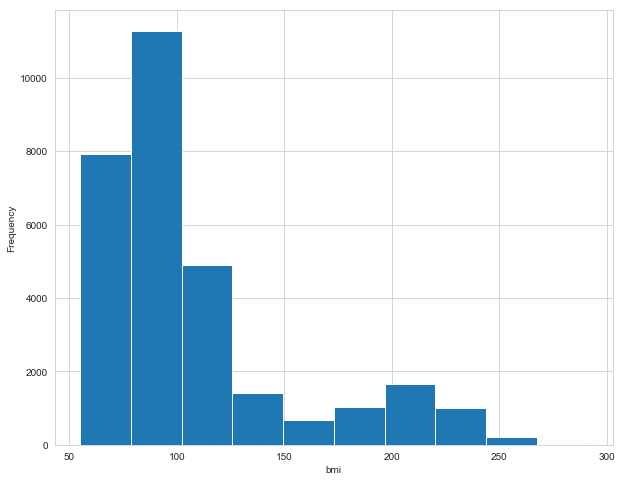

In [19]:
avg_glucose_level = dataframe_clean['avg_glucose_level']
plt.xlabel('bmi')
plt.ylabel('frequency')
avg_glucose_level.plot(kind ='hist')

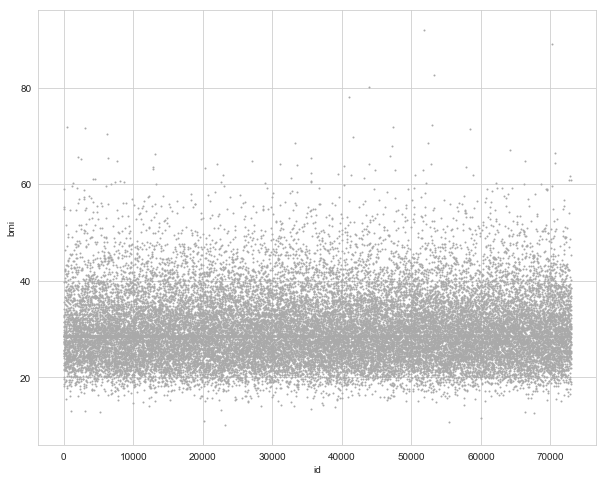

In [20]:
dataframe_clean.plot(kind='scatter', x='id', y='bmi', c=['darkgray'], s=1)

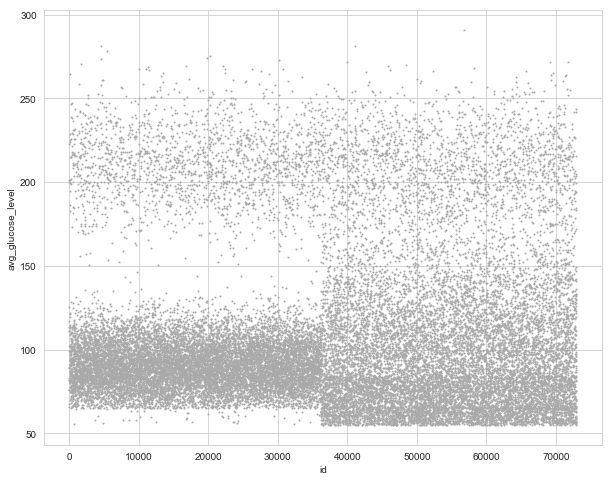

In [21]:
dataframe.plot(kind='scatter', x='id', y='avg_glucose_level', c=['darkgray'], s=1)

C:\Users\Abhishek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


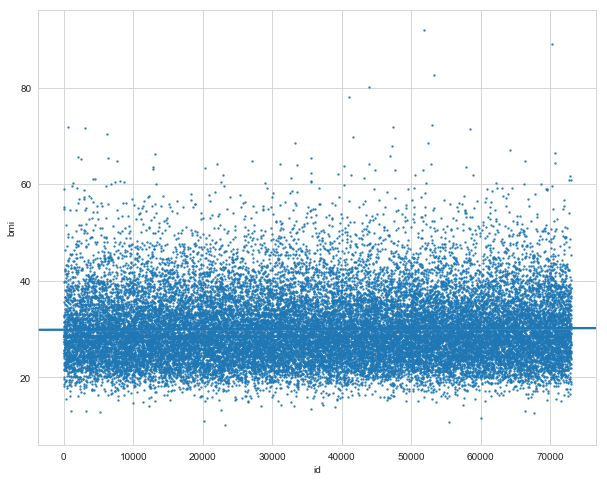

In [23]:
sb.regplot(x='id', y='bmi', data=dataframe_clean, scatter=True, scatter_kws={'s':2}) 

C:\Users\Abhishek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


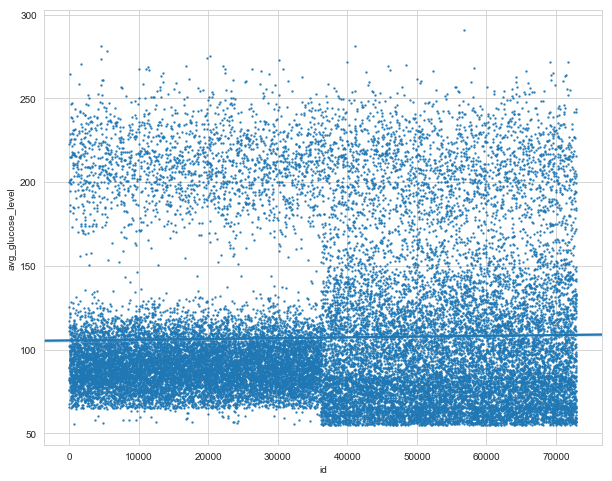

In [24]:
sb.regplot(x='id', y='avg_glucose_level', data=dataframe_clean, scatter=True, scatter_kws={'s':2}) 

In [25]:
from pandas import Series, DataFrame

from pandas.tools.plotting import scatter_matrix

In [38]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sb.set_style('whitegrid')

In [32]:
dataframe_new = dataframe.drop('id', 1)
print(dataframe_new.head(5))

       gender   age  hypertension  heart_disease  ever_married  work_type  \
id                                                                          
30468       1  58.0             1              0             1          0   
56543       0  70.0             0              0             1          0   
52800       0  52.0             0              0             1          0   
41413       0  75.0             0              1             1          1   
15266       0  32.0             0              0             1          0   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
id                                                                      
30468               1              87.96  39.2               0       0  
56543               0              69.04  35.9               1       0  
52800               1              77.59  17.7               1       0  
41413               0             243.53  27.0               0       0  
15266               0 

In [27]:
dataframe_clean_new = dataframe_clean.drop('id', 1)
print(dataframe_clean_new.head(5))

       gender   age  hypertension  heart_disease  ever_married  work_type  \
id                                                                          
30468       1  58.0             1              0             1          0   
56543       0  70.0             0              0             1          0   
52800       0  52.0             0              0             1          0   
41413       0  75.0             0              1             1          1   
15266       0  32.0             0              0             1          0   

       Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
id                                                                      
30468               1              87.96  39.2               0       0  
56543               0              69.04  35.9               1       0  
52800               1              77.59  17.7               1       0  
41413               0             243.53  27.0               0       0  
15266               0 

[]

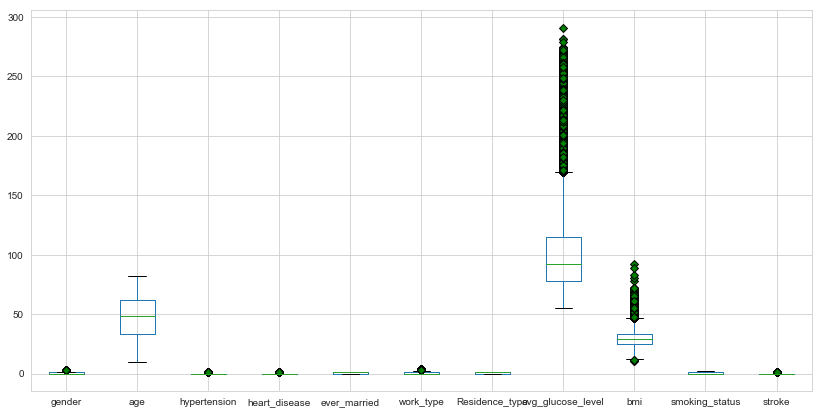

In [39]:
green_diamond = dict(markerfacecolor='g', marker='D')
dataframe_clean_new.boxplot(flierprops=green_diamond)
plt.plot()

In [41]:
dataframe_clean.columns = ['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level', 'bmi','smoking_status','stroke']
X = dataframe_clean.iloc[:,0:10].values
Y = dataframe_clean.iloc[:,10].values

dataframe_clean[:5]
print (X)

[[3.0468e+04 1.0000e+00 5.8000e+01 ... 1.0000e+00 8.7960e+01 3.9200e+01]
 [5.6543e+04 0.0000e+00 7.0000e+01 ... 0.0000e+00 6.9040e+01 3.5900e+01]
 [5.2800e+04 0.0000e+00 5.2000e+01 ... 1.0000e+00 7.7590e+01 1.7700e+01]
 ...
 [2.8375e+04 0.0000e+00 8.2000e+01 ... 1.0000e+00 9.1940e+01 2.8900e+01]
 [2.7973e+04 1.0000e+00 4.0000e+01 ... 1.0000e+00 9.9160e+01 3.3200e+01]
 [3.6271e+04 0.0000e+00 8.2000e+01 ... 1.0000e+00 7.9480e+01 2.0600e+01]]


In [42]:
pd.options.display.float_format = '{:,.1f}'.format

X_df = pd.DataFrame(X)

print (X_df.describe())

             0        1        2        3        4        5        6        7  \
count 30,108.0 30,108.0 30,108.0 30,108.0 30,108.0 30,108.0 30,108.0 30,108.0   
mean  36,596.9      0.4     47.9      0.1      0.1      0.7      0.7      0.5   
std   21,119.3      0.5     18.8      0.3      0.2      0.4      1.1      0.5   
min        1.0      0.0     10.0      0.0      0.0      0.0      0.0      0.0   
25%   18,254.2      0.0     33.0      0.0      0.0      0.0      0.0      0.0   
50%   36,775.5      0.0     48.0      0.0      0.0      1.0      0.0      1.0   
75%   54,861.8      1.0     62.0      0.0      0.0      1.0      1.0      1.0   
max   72,943.0      3.0     82.0      1.0      1.0      1.0      4.0      1.0   

             8        9  
count 30,108.0 30,108.0  
mean     107.2     30.0  
std       46.0      7.1  
min       55.0     10.1  
25%       77.8     25.1  
50%       92.4     28.7  
75%      114.5     33.6  
max      291.1     92.0  


In [43]:
x = dataframe.drop('stroke', 1)
print(x.head(5))

          id  gender  age  hypertension  heart_disease  ever_married  \
id                                                                     
30468  30468       1 58.0             1              0             1   
56543  56543       0 70.0             0              0             1   
52800  52800       0 52.0             0              0             1   
41413  41413       0 75.0             0              1             1   
15266  15266       0 32.0             0              0             1   

       work_type  Residence_type  avg_glucose_level  bmi  smoking_status  
id                                                                        
30468          0               1               88.0 39.2               0  
56543          0               0               69.0 35.9               1  
52800          0               1               77.6 17.7               1  
41413          1               0              243.5 27.0               0  
15266          0               0             

In [45]:
y = dataframe['stroke']
print(y.head(5))

id
30468    0
56543    0
52800    0
41413    0
15266    0
Name: stroke, dtype: int64


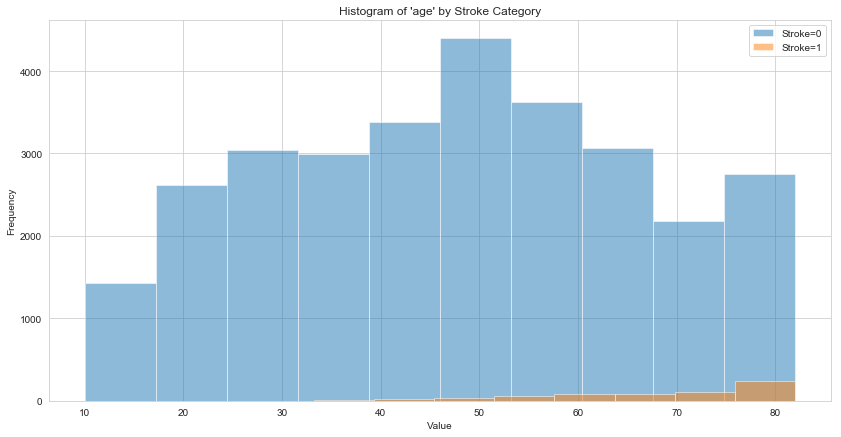

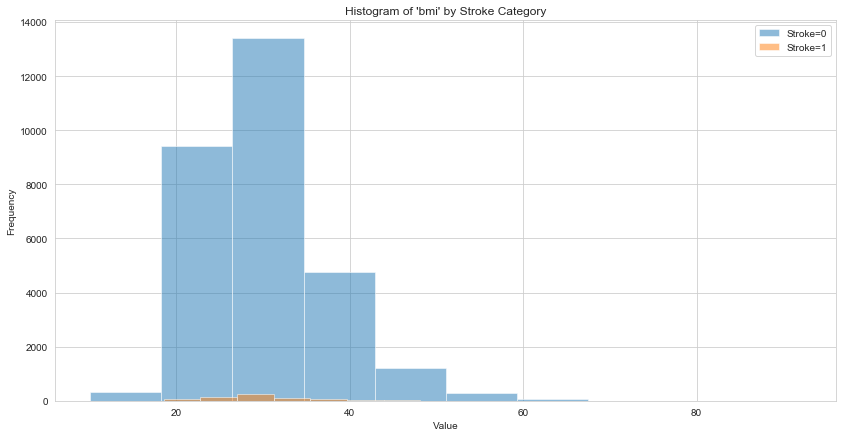

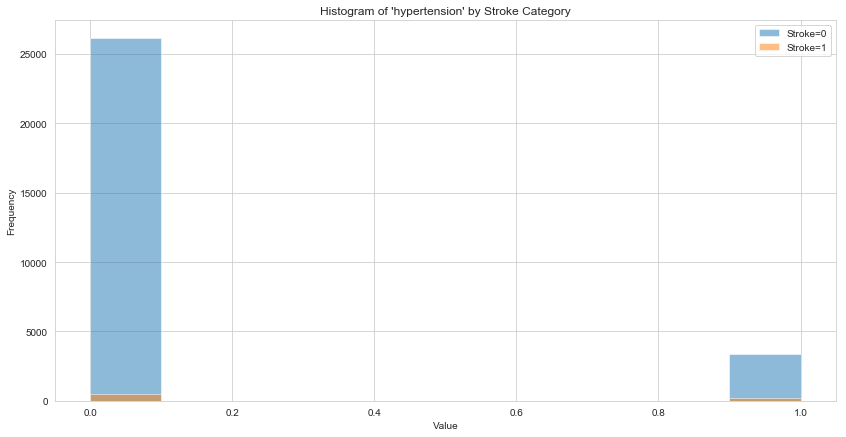

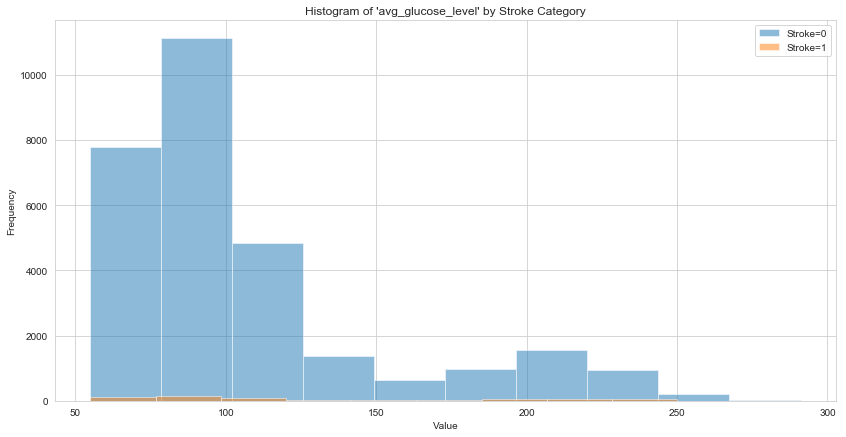

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def plot_histogram_dv(x, y):
    plt.hist(list(x[y == 0]), alpha=0.5, label='Stroke=0')
    plt.hist(list(x[y == 1]), alpha=0.5, label='Stroke=1')
    plt.title("Histogram of '{var_name}' by Stroke Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()


plot_histogram_dv(x['age'], y)
plot_histogram_dv(x['bmi'], y)
plot_histogram_dv(x['hypertension'], y)
plot_histogram_dv(x['avg_glucose_level'], y)